# Spectral Graph K-partitioning

---

Instead of using recursive spectral bipartitioning, the graph $k$-partitioning problem can be solved using $k$ eigenvectors which correspond to $k$ smallest eigenvalues of Laplaciain matrix or normalized Laplacian matrix, respectively.

Suggested reading is [U. von Luxburg, A Tutorial on Spectral Clustering][Lux07], which includes the quote _"spectral clustering cannot serve as a “black box algorithm” which automatically detects the correct clusters in any
given data set. But it can be considered as a powerful tool which can produce good results if applied with care."_

[Lux07]: http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/luxburg06_TR_v2_4139%5b1%5d.pdf "U. von Luxburg, 'A Tutorial on Spectral Clustering', Max Planck Institute for Biological Cybernetics, Tübingen, 2007."

## Prerequisites

The reader should be familiar with k-means algorithm, spectral graph bipartitioning and 
recursive bipartitioning.
 
## Competences 

The reader should be able to apply graph spectral k-partitioning to data clustering problems.

__Credits__: The notebook is based on [I. Mirošević, Spectral Graph Partitioning and Application to Knowledge Extraction][Mir05].

[Mir05]: #1 "I. Mirošević, 'Spectral Graph Partitioning and Application to Knowledge Extraction', M.Sc. Thesis, Iniversity of Zagreb, 2005 (in Croatian)." 

---

## The relaxed problem

Let $G=(V,E)$ be a weighted graph with weights $\omega$, with weights matrix $W$, Laplacian matrix $L=D-W$, and normalized Laplacian matrix $L_n=D^{-1/2}(D-W)D^{-1/2}$. 

Let the $k$-partition $\pi_k =\{V_{1},V_{2},...,V_{k}\}$, the cut $cut(\pi_k)$, 
the proportional cut $pcut(\pi_k)$ and 
the normalized cut $ncut(\pi_k)$ be defined as in the
[Spectral Graph Bipartitioning](L10 Spectral Graph Bipartitioning.ipynb) notebook.

### Definition

__Partition vectors__ of a $k$-partition $\pi_k$ are
\begin{align*}
h_{1} &=[\overset{\displaystyle |V_{1}|}{\overbrace{1,\cdots
,1}},0,\cdots
,0,\cdots ,0,\cdots ,0]^{T}  \\
h_{2} &=[0,\cdots
,0,\overset{\displaystyle |V_{2}|}{\overbrace{1,\cdots ,1}} ,\cdots ,0,\cdots
,0]^{T} \\
&\vdots \\
h_{k} &=[0,\cdots ,0,0,\cdots ,0,\cdots
,\overset{\displaystyle |V_{k}|}{ \overbrace{1,\cdots ,1}}]^{T}.
\end{align*}

### Facts

1. Set
\begin{align*}
X&=\begin{bmatrix} x_1 & x_2 &\cdots & x_k \end{bmatrix}, \quad 
x_i=\displaystyle \frac{h_i}{\|h_i\|_2}, \\
Y&=\begin{bmatrix} y_1 & y_2 &\cdots & y_k \end{bmatrix}, \quad
y_i=\displaystyle \frac{D^{1/2}h_i}{\|D^{1/2}h_i\|_2}.
\end{align*}
It holds
\begin{align*}
& cut(V_{i},V\backslash V_{i})=h_{i}^{T}(D-W)h_{i}=h_{i}^{T}L h_{i},\quad 
\omega( C_{i})=h_{i}^{T}D h_{i},\quad |C_{i}| =h_{i}^{T}h_{i},\\
& pcut(\pi_k) =\frac{h_{1}^{T}L h_{1}}{h_{1}^{T} h_{1}}+
\cdots + \frac{h_{k}^{T}L h_{k}}{h_{k}^{T}h_{k}}
=x_{1}^{T}L x_{1}+\cdots +x_{k}^{T}Lx_{k}=\mathop{\mathrm{trace}}(X^{T}LX),\\
& ncut(\pi_k)=\frac{h_{1}^{T}L h_{1}}{h_{1}^{T}D h_{1}}+\cdots
+\frac{h_{k}^{T}L h_{k}}{h_{k}^{T}D h_{k}}
=\mathop{\mathrm{trace}}(Y^{T}L_{n}Y).
\end{align*}

2. The __relaxed__ $k$-partitioning problems are trace-minimization problems,
\begin{align*}
\min_{\displaystyle \pi_k} pcut(\pi_k) &\geq
\underset{\displaystyle X\in\mathbb{R}^{n\times k}}{\min_{\displaystyle X^{T}X=I}}
\mathop{\mathrm{trace}}(X^{T}LX),\\
\min_{\displaystyle \pi_k} ncut(\pi_k) &\geq
\underset{\displaystyle Y\in\mathbb{R}^{n\times
k}}{\min_{\displaystyle Y^{T}Y=I}}\mathop{\mathrm{trace}}(Y^{T}L_{n}Y).
\end{align*}

3. __Ky-Fan  Theorem__: Let $A\in \mathbb{R}^{n\times n}$ be a symmetric matrix with
eigenvalues $\lambda _1\leq \cdots \leq \lambda_n$. Then
$$
\underset{\displaystyle Z^TZ=I}{\min_{\displaystyle Z\in \mathbb{R}^{n\times
k}}}\mathop{\mathrm{trace}}\left(Z^{T}AZ\right)
=\sum_{i=1}^{k}\lambda_{i}.
$$

4. Let $\lambda_1\leq \cdots \leq \lambda_n$ be the eigenvalues of $L$ with eigenvectors 
$v^{[1]},\cdots ,v^{[k]}$. The solution of the relaxed proportional cut problem is the matrix $X=\begin{bmatrix}v^{[1]} & \cdots & v^{[k]}\end{bmatrix}$, and it holds
$\min\limits_{\displaystyle \pi_k} pcut(\pi_k)\geq \sum\limits_{i=1}^k \lambda_i$.

5. Let $\mu_1\leq \cdots \leq \mu_n$ be the eigenvalues of $L_n$ with eigenvectors 
$w^{[1]},\cdots ,w^{[k]}$. The solution of the relaxed normalized cut problem is the matrix $Y=\begin{bmatrix}w^{[1]} & \cdots & w^{[k]}\end{bmatrix}$, and it holds
$\min\limits_{\displaystyle \pi_k} ncut(\pi_k)\geq \sum\limits_{i=1}^k \mu_i$.

6. It remains to recover the $k$-partition. The k-means algorithm applied to rows of the matrices $X$ or $D^{-1/2}Y$, will compute the $k$ centers and the assignment vector whose $i$-th component denotes the subset $V_j$ to which the vertex $i$ belongs.

### Example - Graph with three clusters

In [3]:
using Graphs
using IJuliaPortrayals
using Clustering

In [4]:
# Sources, targets, and weight
sn=[1,1,1,2,2,3,2,3,5,6,7,7,8]
tn=[2,3,4,3,4,4,7,5,6,9,9,8,9]
wn=[2,3,4,4,5,6,1,1,7,1,3,4,2]
[sn tn wn]

13×3 Array{Int64,2}:
 1  2  2
 1  3  3
 1  4  4
 2  3  4
 2  4  5
 3  4  6
 2  7  1
 3  5  1
 5  6  7
 6  9  1
 7  9  3
 7  8  4
 8  9  2

In [5]:
n=9
m=length(sn)
G = inclist(ExVertex, ExEdge{ExVertex}; is_directed=false)
for i=1:9
    add_vertex!(G, ExVertex(i,"$i"))
end
for i=1:m
    add_edge!(G, vertices(G)[sn[i]], vertices(G)[tn[i]])
end
for i=1:length(G.inclist)
    for j=1:length(G.inclist[i])
        ei=G.inclist[i][j]
        attrs = attributes(ei, G)
        attrs["label"] = wn[edge_index(ei,G)]
    end
end

In [7]:
# What is the optimal tripartition?
GraphViz(to_dot(G),"neato","svg")

IJuliaPortrayals.GraphViz("graph graphname {\n1 -- 2 [\"label\"=\"2\"]\n1 -- 3 [\"label\"=\"3\"]\n1 -- 4 [\"label\"=\"4\"]\n2 -- 3 [\"label\"=\"4\"]\n2 -- 4 [\"label\"=\"5\"]\n2 -- 7 [\"label\"=\"1\"]\n3 -- 4 [\"label\"=\"6\"]\n3 -- 5 [\"label\"=\"1\"]\n5 -- 6 [\"label\"=\"7\"]\n6 -- 9 [\"label\"=\"1\"]\n7 -- 9 [\"label\"=\"3\"]\n7 -- 8 [\"label\"=\"4\"]\n8 -- 9 [\"label\"=\"2\"]\n}\n","neato","svg")

In [8]:
L=laplacian_matrix(G,wn)

9×9 Array{Int64,2}:
  9  -2  -3  -4   0   0   0   0   0
 -2  12  -4  -5   0   0  -1   0   0
 -3  -4  14  -6  -1   0   0   0   0
 -4  -5  -6  15   0   0   0   0   0
  0   0  -1   0   8  -7   0   0   0
  0   0   0   0  -7   8   0   0  -1
  0  -1   0   0   0   0   8  -4  -3
  0   0   0   0   0   0  -4   6  -2
  0   0   0   0   0  -1  -3  -2   6

In [9]:
# Normalized Laplacian matrix
function normalized(L::Matrix)
    D=1.0./sqrt(diag(L))
    n=length(D)
    Ln=map(Float64,Symmetric([L[i,j]*D[i]*D[j] for i=1:n,j=1:n]))
    # Set diagonal exactly to 1
    for i=1:n
        Ln[i,i]=1.0
    end
    Ln  
end

normalized (generic function with 1 method)

In [10]:
Ln=normalized(L)

9×9 Array{Float64,2}:
  1.0       -0.19245   -0.267261   …   0.0        0.0        0.0     
 -0.19245    1.0       -0.308607      -0.102062   0.0        0.0     
 -0.267261  -0.308607   1.0            0.0        0.0        0.0     
 -0.344265  -0.372678  -0.414039       0.0        0.0        0.0     
  0.0        0.0       -0.0944911      0.0        0.0        0.0     
  0.0        0.0        0.0        …   0.0        0.0       -0.144338
  0.0       -0.102062   0.0            1.0       -0.57735   -0.433013
  0.0        0.0        0.0           -0.57735    1.0       -0.333333
  0.0        0.0        0.0           -0.433013  -0.333333   1.0     

In [11]:
# Proportional cut, the clustering is visible in the components of v_2 and v_3
λ,Y=eigs(L,nev=3,which=:SM, v0=ones(n))

([4.93432e-16,0.788523,1.21049],
[-0.333333 0.383624 -0.121476; -0.333333 0.323492 -0.129956; … ; -0.333333 -0.424836 -0.311411; -0.333333 -0.395981 -0.18078],

3,1,9,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [12]:
out=kmeans(Y',3)

Clustering.KmeansResult{Float64}([-0.333333 -0.333333 -0.333333; -0.392111 -0.121365 0.354766; -0.258226 0.608256 -0.110459],[3,3,3,3,2,2,1,1,1],[0.000954196,0.00135823,0.00133947,0.000178756,0.000693622,0.000693622,0.00192775,0.00389961,0.00601275],[3,2,4],[3.0,2.0,4.0],0.017057998334039592,2,true)

In [13]:
# Normalized cut
# Lanczos cannot be used for "smallest in magnitude" evals of a singular matrix
# The above case is exception, rather than rule.
# λ,Y=eigs(Ln,nev=3,which=:SM) 
μ,Y=eig(Ln)
Y=Y[:,1:3]
D=sqrt(diag(L))
Y=diagm(1.0./D)*Y
out=kmeans(Y',3)

Clustering.KmeansResult{Float64}([-0.107833 -0.107833 -0.107833; -0.104042 0.0909339 -0.144522; -0.19892 0.011189 0.131546],[2,2,2,2,1,1,3,3,3],[6.01793e-5,0.000196695,0.000160142,3.37657e-5,8.23425e-5,8.23425e-5,0.00019114,0.000443174,0.000779667],[2,4,3],[2.0,4.0,3.0],0.00202944764931251,2,true)

### Example - Concentric rings

In [14]:
using Winston
using Colors
using Distances

In [15]:
function plotKpartresult(C::Vector,X::Array)
    p=FramedPlot()
    for j=1:k
        # Random color
        col=RGB(rand(),rand(),rand())
        p1=Points(X[1,find(C.==j)],
        X[2,find(C.==j)],"color",col,symbolkind="dot")
        add(p,p1)
    end
    p
end

plotKpartresult (generic function with 1 method)

In [30]:
# Generate concentric rings
k=4
# Center
center=[rand(-5:5);rand(-5:5)]
# Radii
radii=randperm(4)[1:k]
# Number of points in circles
sizes=rand(500:1000,k)
center,radii,sizes

([4,-2],[1,4,3,2],[917,526,871,803])

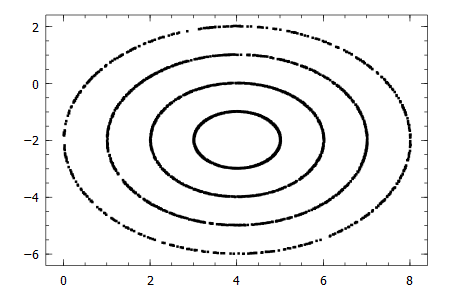

In [31]:
# Points
m=sum(sizes)
X=Array(Float64,2,m)
first=0
last=0
for j=1:k
    first=last+1
    last=last+sizes[j]
    # Random angles
    ϕ=2*π*rand(sizes[j])
    for i=first:last
        l=i-first+1
        X[:,i]=center+radii[j]*[cos(ϕ[l]);sin(ϕ[l])]+(rand(2)-0.5)/50
    end
end
Winston.plot(X[1,:],X[2,:],".")

In [32]:
S=pairwise(SqEuclidean(),X)
# S=pairwise(Cityblock(),X)
β=0.1

0.1

In [33]:
W=exp(-β*S)

3117×3117 Array{Float64,2}:
 1.0       0.688622  0.673913  0.666637  …  0.488116  0.41798   0.519539
 0.688622  1.0       0.93926   0.979018     0.620821  0.786088  0.828655
 0.673913  0.93926   1.0       0.987689     0.823825  0.90664   0.626592
 0.666637  0.979018  0.987689  1.0          0.739539  0.878662  0.717659
 0.790191  0.929138  0.795979  0.853335     0.450412  0.564254  0.896089
 0.95997   0.756858  0.676048  0.698986  …  0.415901  0.414543  0.670954
 0.697097  0.881358  0.985862  0.949622     0.887725  0.889709  0.538447
 0.843668  0.726112  0.843234  0.785303     0.819006  0.660479  0.410967
 0.997777  0.683325  0.684697  0.670544     0.516897  0.431544  0.49495 
 0.744102  0.96961   0.849768  0.906853     0.499015  0.641899  0.9021  
 0.920771  0.685767  0.767828  0.721022  …  0.702311  0.548032  0.411439
 0.999976  0.692381  0.678048  0.670714     0.49162   0.421792  0.521857
 0.98525   0.727482  0.672315  0.68327      0.43974   0.411238  0.606991
 ⋮                     

In [34]:
D=vec(sum(W,2))
L=diagm(D)-W
Ln=normalized(L)

3117×3117 Array{Float64,2}:
  1.0          -0.00039933   -0.000391338  …  -0.000263788  -0.000327749
 -0.00039933    1.0          -0.000540063     -0.000491225  -0.000517615
 -0.000391338  -0.000540063   1.0             -0.000567338  -0.000391936
 -0.000387019  -0.000562787  -0.000568553     -0.000549697  -0.00044879 
 -0.000459423  -0.000534897  -0.00045887      -0.00035352   -0.000561195
 -0.000561118  -0.000438047  -0.000391815  …  -0.000261111  -0.000422447
 -0.000405212  -0.000507284  -0.000568215     -0.000557309  -0.000337143
 -0.000491753  -0.000419072  -0.000487338     -0.000414852  -0.000258026
 -0.000583926  -0.000395969  -0.000397311     -0.00027215   -0.00031201 
 -0.000432048  -0.00055745   -0.000489223     -0.000401629  -0.000564204
 -0.00053785   -0.000396639  -0.000444714  …  -0.000344964  -0.000258879
 -0.000585083  -0.000401128  -0.000393365     -0.000265941  -0.000328898
 -0.000575983  -0.00042111   -0.000389712     -0.000259069  -0.000382233
  ⋮                    

λ = [-9.79225e-18,0.171399,-0.218324,0.567124]


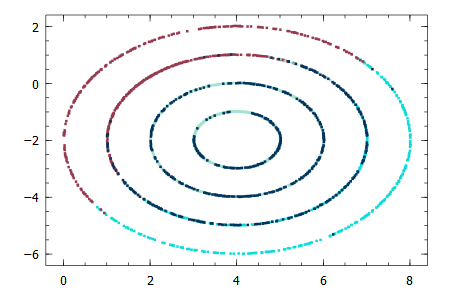

In [35]:
# Normalized Laplacian
λ,Y=eigs(Ln,nev=k,which=:SM, v0=ones(m))
@show λ
Y=diagm(1.0./sqrt(D))*Y
out=kmeans(Y',k)
plotKpartresult(out.assignments,X)

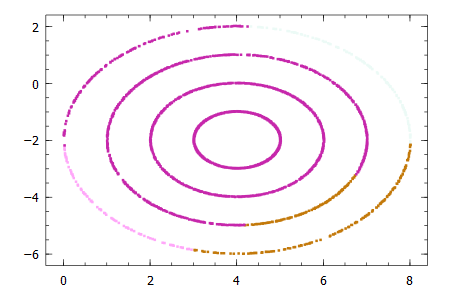

In [36]:
# Laplacian
λ,Y=eigs(L,nev=k,which=:SM, v0=ones(m))
out=kmeans(Y',k)
plotKpartresult(out.assignments,X)

Caveat! There is a little bit of cheating here.